## Import functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
plt.style.use('seaborn')

## Data Preparation and EDA

In [3]:
df_heart = pd.read_csv('cleveland.csv',header=None, names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Based on .info(), both 'ca' and 'thal' are objects. Hence, there must be rows where both columns have string values. Let's remove rows where both columns have string values (in this case '?' based on the error)

In [6]:
test = df_heart[(df_heart['ca'] == '?') | (df_heart['thal'] == '?')] 
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0


In [7]:
removeable = df_heart[(df_heart['ca'] == '?') | (df_heart['thal'] == '?')].index
df_heart.drop(removeable, inplace = True)
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
cols = ['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']

df_heart[cols] = df_heart[cols].astype(float).astype(int)

In [9]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


Based on the UCI Repository, it is said that for target, 0 means heart disease is absent and 1,2,3,4 mean heart disease is present. I decided to change the values so that the target column only contains 0 (absent) and 1 (present).

In [10]:
df_heart['target'] = df_heart['target'].replace([1, 2, 3, 4], 1)

In [11]:
import pandas_profiling as pp
pp.ProfileReport(df_heart)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Definition

In [12]:
X = df_heart.drop('target',axis=1)
y = df_heart['target']
print('Input', X.shape)
print('Output', y.shape)

Input (297, 13)
Output (297,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
y_train = y_train.values.reshape(-1,1)
y_train = to_categorical(y_train)
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [15]:
y_test = y_test.values.reshape(-1,1)
y_test = to_categorical(y_test)
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [16]:
model = Sequential(name='model_novie')
model.add(Dense(50, input_dim=13, activation='relu', kernel_initializer='he_uniform')) #input layer and 1st hidden layer
model.add(Dense(25, activation='relu')) #2nd hidden layer
model.add(Dense(15, activation='relu')) #3rd hidden layer
model.add(Dense(2, activation='sigmoid')) #output layer

In [17]:
model.summary()

Model: "model_novie"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 2,397
Trainable params: 2,397
Non-trainable params: 0
_________________________________________________________________


Binary Crossentropy was chosen because output is either 0 (absent) or 1 (present).

In [18]:
optimizer = SGD(lr=0.01,momentum=0.7)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/pt.gojekindonesia/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## First Experiment

Number of epochs is set to 75, and batch_size is still the same as amount of dataset

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=len(X_train), verbose=1)

Epoch 1/75
1/1 [==============================] - 1s 684ms/step - loss: 24.4121 - accuracy: 0.4686 - val_loss: 23.2029 - val_accuracy: 0.4556
Epoch 2/75
1/1 [==============================] - 0s 18ms/step - loss: 23.0465 - accuracy: 0.4686 - val_loss: 21.8543 - val_accuracy: 0.4556
Epoch 3/75
1/1 [==============================] - 0s 17ms/step - loss: 21.7036 - accuracy: 0.4686 - val_loss: 20.4933 - val_accuracy: 0.4556
Epoch 4/75
1/1 [==============================] - 0s 17ms/step - loss: 20.3666 - accuracy: 0.4589 - val_loss: 19.0776 - val_accuracy: 0.4444
Epoch 5/75
1/1 [==============================] - 0s 17ms/step - loss: 18.9496 - accuracy: 0.4589 - val_loss: 17.5189 - val_accuracy: 0.4444
Epoch 6/75
1/1 [==============================] - 0s 16ms/step - loss: 17.4283 - accuracy: 0.4541 - val_loss: 15.8968 - val_accuracy: 0.4556
Epoch 7/75
1/1 [==============================] - 0s 17ms/step - loss: 15.8694 - accuracy: 0.4493 - val_loss: 14.2797 - val_accuracy: 0.4111
Epoch 8/75
1

1/1 [==============================] - 0s 40ms/step - loss: 0.9193 - accuracy: 0.4686 - val_loss: 0.9077 - val_accuracy: 0.5000
Epoch 60/75
1/1 [==============================] - 0s 39ms/step - loss: 0.9101 - accuracy: 0.4734 - val_loss: 0.8796 - val_accuracy: 0.5111
Epoch 61/75
1/1 [==============================] - 0s 38ms/step - loss: 0.8890 - accuracy: 0.4928 - val_loss: 0.8474 - val_accuracy: 0.5222
Epoch 62/75
1/1 [==============================] - 0s 23ms/step - loss: 0.8631 - accuracy: 0.5459 - val_loss: 0.8225 - val_accuracy: 0.5222
Epoch 63/75
1/1 [==============================] - 0s 45ms/step - loss: 0.8421 - accuracy: 0.5797 - val_loss: 0.8062 - val_accuracy: 0.5222
Epoch 64/75
1/1 [==============================] - 0s 28ms/step - loss: 0.8304 - accuracy: 0.5749 - val_loss: 0.7943 - val_accuracy: 0.5333
Epoch 65/75
1/1 [==============================] - 0s 66ms/step - loss: 0.8233 - accuracy: 0.5845 - val_loss: 0.7775 - val_accuracy: 0.5667
Epoch 66/75
1/1 [===============

In [20]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.638, Valid: 0.644


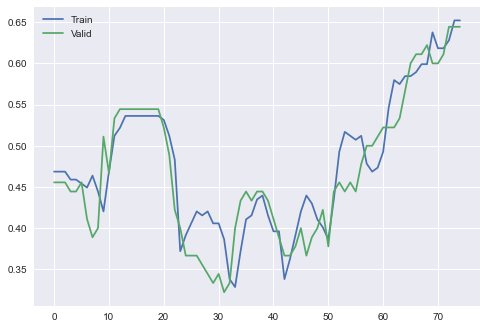

In [21]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## Second Experiment

Let's increase the number of epochs to 75, but batch_size is still the same as amount of dataset

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train), verbose=1)

Epoch 1/150
1/1 [==============================] - 0s 49ms/step - loss: 0.7014 - accuracy: 0.6377 - val_loss: 0.6285 - val_accuracy: 0.6556
Epoch 2/150
1/1 [==============================] - 0s 22ms/step - loss: 0.6966 - accuracy: 0.6570 - val_loss: 0.6252 - val_accuracy: 0.6556
Epoch 3/150
1/1 [==============================] - 0s 26ms/step - loss: 0.6901 - accuracy: 0.6667 - val_loss: 0.6192 - val_accuracy: 0.6444
Epoch 4/150
1/1 [==============================] - 0s 26ms/step - loss: 0.6823 - accuracy: 0.6522 - val_loss: 0.6139 - val_accuracy: 0.6222
Epoch 5/150
1/1 [==============================] - 0s 22ms/step - loss: 0.6749 - accuracy: 0.6667 - val_loss: 0.6111 - val_accuracy: 0.6444
Epoch 6/150
1/1 [==============================] - 0s 25ms/step - loss: 0.6693 - accuracy: 0.6763 - val_loss: 0.6108 - val_accuracy: 0.6667
Epoch 7/150
1/1 [==============================] - 0s 31ms/step - loss: 0.6647 - accuracy: 0.6812 - val_loss: 0.6090 - val_accuracy: 0.6889
Epoch 8/150
1/1 [===

1/1 [==============================] - 0s 24ms/step - loss: 0.5683 - accuracy: 0.7295 - val_loss: 0.5065 - val_accuracy: 0.7333
Epoch 60/150
1/1 [==============================] - 0s 24ms/step - loss: 0.5675 - accuracy: 0.7295 - val_loss: 0.5058 - val_accuracy: 0.7444
Epoch 61/150
1/1 [==============================] - 0s 44ms/step - loss: 0.5667 - accuracy: 0.7295 - val_loss: 0.5050 - val_accuracy: 0.7444
Epoch 62/150
1/1 [==============================] - 0s 50ms/step - loss: 0.5659 - accuracy: 0.7295 - val_loss: 0.5042 - val_accuracy: 0.7444
Epoch 63/150
1/1 [==============================] - 0s 47ms/step - loss: 0.5651 - accuracy: 0.7343 - val_loss: 0.5035 - val_accuracy: 0.7444
Epoch 64/150
1/1 [==============================] - 0s 28ms/step - loss: 0.5642 - accuracy: 0.7343 - val_loss: 0.5028 - val_accuracy: 0.7444
Epoch 65/150
1/1 [==============================] - 0s 23ms/step - loss: 0.5633 - accuracy: 0.7343 - val_loss: 0.5021 - val_accuracy: 0.7444
Epoch 66/150
1/1 [========

1/1 [==============================] - 0s 23ms/step - loss: 0.5310 - accuracy: 0.7681 - val_loss: 0.4799 - val_accuracy: 0.7556
Epoch 118/150
1/1 [==============================] - 0s 27ms/step - loss: 0.5304 - accuracy: 0.7681 - val_loss: 0.4795 - val_accuracy: 0.7556
Epoch 119/150
1/1 [==============================] - 0s 24ms/step - loss: 0.5299 - accuracy: 0.7729 - val_loss: 0.4790 - val_accuracy: 0.7667
Epoch 120/150
1/1 [==============================] - 0s 26ms/step - loss: 0.5293 - accuracy: 0.7778 - val_loss: 0.4785 - val_accuracy: 0.7667
Epoch 121/150
1/1 [==============================] - 0s 25ms/step - loss: 0.5287 - accuracy: 0.7778 - val_loss: 0.4782 - val_accuracy: 0.7556
Epoch 122/150
1/1 [==============================] - 0s 23ms/step - loss: 0.5281 - accuracy: 0.7778 - val_loss: 0.4779 - val_accuracy: 0.7556
Epoch 123/150
1/1 [==============================] - 0s 26ms/step - loss: 0.5276 - accuracy: 0.7729 - val_loss: 0.4777 - val_accuracy: 0.7556
Epoch 124/150
1/1 [=

In [23]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.783, Valid: 0.756


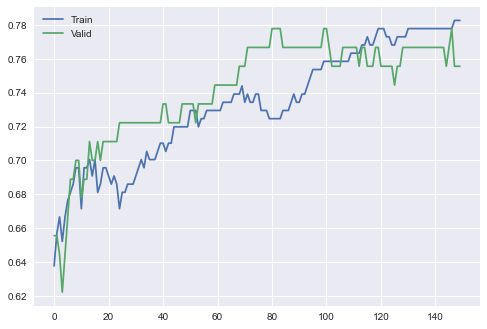

In [24]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## Third Experiment

Let's lower the batch_size to 8 and increase the number of epochs to 300.

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=8, verbose=1)

Epoch 1/300
26/26 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.6184 - val_loss: 0.5395 - val_accuracy: 0.8111
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.7198 - val_loss: 0.4656 - val_accuracy: 0.7778
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6908 - val_loss: 0.6041 - val_accuracy: 0.7000
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7101 - val_loss: 0.4941 - val_accuracy: 0.7444
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7391 - val_loss: 0.4764 - val_accuracy: 0.7889
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7585 - val_loss: 0.5170 - val_accuracy: 0.7222
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7295 - val_loss: 0.4721 - val_accuracy: 0.7556
Epoch 8/300
2

Epoch 59/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8357 - val_loss: 0.3574 - val_accuracy: 0.8556
Epoch 60/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8309 - val_loss: 0.4294 - val_accuracy: 0.8222
Epoch 61/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8261 - val_loss: 0.3642 - val_accuracy: 0.8444
Epoch 62/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.8019 - val_loss: 0.4760 - val_accuracy: 0.7333
Epoch 63/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7633 - val_loss: 0.4651 - val_accuracy: 0.7333
Epoch 64/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7343 - val_loss: 0.5108 - val_accuracy: 0.8000
Epoch 65/300
26/26 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7343 - val_loss: 0.5354 - val_accuracy: 0.7778
Epoch 

26/26 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8357 - val_loss: 0.4227 - val_accuracy: 0.7889
Epoch 117/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.7971 - val_loss: 0.3580 - val_accuracy: 0.8667
Epoch 118/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8502 - val_loss: 0.3815 - val_accuracy: 0.8222
Epoch 119/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8261 - val_loss: 0.3515 - val_accuracy: 0.8667
Epoch 120/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7971 - val_loss: 0.4460 - val_accuracy: 0.7333
Epoch 121/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7681 - val_loss: 0.4789 - val_accuracy: 0.8000
Epoch 122/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7826 - val_loss: 0.4791 - val_accuracy: 0.7333
Epoch 123/300

26/26 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8357 - val_loss: 0.3497 - val_accuracy: 0.8667
Epoch 174/300
26/26 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8502 - val_loss: 0.3493 - val_accuracy: 0.8556
Epoch 175/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8309 - val_loss: 0.3810 - val_accuracy: 0.8000
Epoch 176/300
26/26 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8164 - val_loss: 0.4200 - val_accuracy: 0.7556
Epoch 177/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8551 - val_loss: 0.3580 - val_accuracy: 0.8556
Epoch 178/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8309 - val_loss: 0.3532 - val_accuracy: 0.8556
Epoch 179/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8454 - val_loss: 0.3616 - val_accuracy: 0.8778
Epoch 180/300

26/26 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8261 - val_loss: 0.3746 - val_accuracy: 0.8556
Epoch 231/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8599 - val_loss: 0.3655 - val_accuracy: 0.8667
Epoch 232/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8647 - val_loss: 0.3727 - val_accuracy: 0.8333
Epoch 233/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8551 - val_loss: 0.3892 - val_accuracy: 0.8000
Epoch 234/300
26/26 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8599 - val_loss: 0.3692 - val_accuracy: 0.8333
Epoch 235/300
26/26 [==============================] - 0s 3ms/step - loss: 0.4070 - accuracy: 0.8261 - val_loss: 0.4000 - val_accuracy: 0.8444
Epoch 236/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8599 - val_loss: 0.3686 - val_accuracy: 0.8444
Epoch 237/300

26/26 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8502 - val_loss: 0.3802 - val_accuracy: 0.8333
Epoch 288/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8696 - val_loss: 0.3778 - val_accuracy: 0.8556
Epoch 289/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8599 - val_loss: 0.4041 - val_accuracy: 0.8000
Epoch 290/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8213 - val_loss: 0.3831 - val_accuracy: 0.8000
Epoch 291/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8551 - val_loss: 0.4136 - val_accuracy: 0.8333
Epoch 292/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8696 - val_loss: 0.4118 - val_accuracy: 0.8000
Epoch 293/300
26/26 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8696 - val_loss: 0.3762 - val_accuracy: 0.8444
Epoch 294/300

In [26]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.884, Valid: 0.822


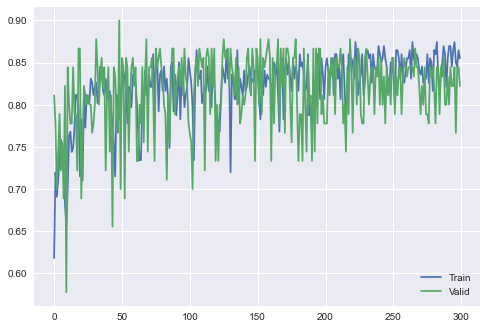

In [27]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

## Fourth Experiment

Next, let's lower the batch_size to 1 but the number of epochs remain the same

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1, verbose=1)

Epoch 1/300
207/207 [==============================] - 0s 2ms/step - loss: 0.9890 - accuracy: 0.5749 - val_loss: 0.7629 - val_accuracy: 0.3667
Epoch 2/300
207/207 [==============================] - 0s 2ms/step - loss: 0.7052 - accuracy: 0.5024 - val_loss: 0.6913 - val_accuracy: 0.5444
Epoch 3/300
207/207 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5362 - val_loss: 0.6908 - val_accuracy: 0.5444
Epoch 4/300
207/207 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5362 - val_loss: 0.6903 - val_accuracy: 0.5444
Epoch 5/300
207/207 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5362 - val_loss: 0.6900 - val_accuracy: 0.5444
Epoch 6/300
207/207 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5362 - val_loss: 0.6885 - val_accuracy: 0.5444
Epoch 7/300
207/207 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5362 - val_loss: 0.6880 - val_accuracy: 0.5444

Epoch 58/300
207/207 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7536 - val_loss: 0.4707 - val_accuracy: 0.8222
Epoch 59/300
207/207 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7874 - val_loss: 0.4788 - val_accuracy: 0.7667
Epoch 60/300
207/207 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7536 - val_loss: 0.5359 - val_accuracy: 0.7111
Epoch 61/300
207/207 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7295 - val_loss: 0.5068 - val_accuracy: 0.8111
Epoch 62/300
207/207 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7826 - val_loss: 0.4538 - val_accuracy: 0.8444
Epoch 63/300
207/207 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7536 - val_loss: 0.4585 - val_accuracy: 0.8000
Epoch 64/300
207/207 [==============================] - 0s 1ms/step - loss: 0.5199 - accuracy: 0.7729 - val_loss: 0.5431 - val_accuracy:

Epoch 115/300
207/207 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8406 - val_loss: 0.3937 - val_accuracy: 0.8333
Epoch 116/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8792 - val_loss: 0.3766 - val_accuracy: 0.8556
Epoch 117/300
207/207 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8068 - val_loss: 0.3880 - val_accuracy: 0.8444
Epoch 118/300
207/207 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8261 - val_loss: 0.3853 - val_accuracy: 0.8556
Epoch 119/300
207/207 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8309 - val_loss: 0.4546 - val_accuracy: 0.8000
Epoch 120/300
207/207 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8309 - val_loss: 0.5072 - val_accuracy: 0.8444
Epoch 121/300
207/207 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.8164 - val_loss: 0.4134 - val_ac

207/207 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8357 - val_loss: 0.3732 - val_accuracy: 0.8556
Epoch 172/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8551 - val_loss: 0.4157 - val_accuracy: 0.8222
Epoch 173/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8502 - val_loss: 0.4560 - val_accuracy: 0.8000
Epoch 174/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8551 - val_loss: 0.3998 - val_accuracy: 0.8222
Epoch 175/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8406 - val_loss: 0.3788 - val_accuracy: 0.8667
Epoch 176/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8357 - val_loss: 0.3851 - val_accuracy: 0.8556
Epoch 177/300
207/207 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8068 - val_loss: 0.3947 - val_accuracy: 0.8444

207/207 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8454 - val_loss: 0.3598 - val_accuracy: 0.8444
Epoch 228/300
207/207 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8357 - val_loss: 0.3993 - val_accuracy: 0.8556
Epoch 229/300
207/207 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8357 - val_loss: 0.4696 - val_accuracy: 0.8333
Epoch 230/300
207/207 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8406 - val_loss: 0.4026 - val_accuracy: 0.8333
Epoch 231/300
207/207 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8551 - val_loss: 0.4894 - val_accuracy: 0.8222
Epoch 232/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8599 - val_loss: 0.5162 - val_accuracy: 0.8222
Epoch 233/300
207/207 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8454 - val_loss: 0.4732 - val_accuracy: 0.8556

207/207 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8696 - val_loss: 0.4647 - val_accuracy: 0.8222
Epoch 284/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8502 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 285/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8744 - val_loss: 0.4052 - val_accuracy: 0.8222
Epoch 286/300
207/207 [==============================] - 0s 1ms/step - loss: 0.2983 - accuracy: 0.8696 - val_loss: 0.4834 - val_accuracy: 0.8222
Epoch 287/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8696 - val_loss: 0.8459 - val_accuracy: 0.7778
Epoch 288/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8744 - val_loss: 0.4468 - val_accuracy: 0.8111
Epoch 289/300
207/207 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8599 - val_loss: 0.4199 - val_accuracy: 0.8333

In [29]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.894, Valid: 0.833


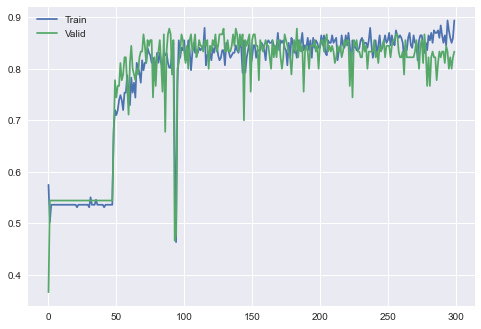

In [30]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

The fourth experiment yields the best training and testing accuracy. 
This means that the larger the number of epochs and the smaller the batch size, the better the accuracy.
However, the drawback of setting high number of epochs and low batch size is processing/training time will take much longer.